In [2]:
# Download Dataset
# from sklearn.datasets import fetch_openml 

# mnist = fetch_openml("mnist_784",version=1)
# mnist.keys()

In [3]:
from joblib import dump,load

# dump((mnist),"dataset.joblib")
# mnist = load("dataset.joblib")

#### 'data' includes array of one instance per row and one Column per feature
#### 'target' includes all digits label
#### 'DESCR' describes data set

In [4]:
X, y = mnist.data, mnist.target 
print("Train set:", X.shape)
print("Test set:", y.shape)

Train set: (70000, 784)
Test set: (70000,)


In [5]:
# Converting Data Frame into Numpy Array
import pandas as pd

X = X.to_numpy()

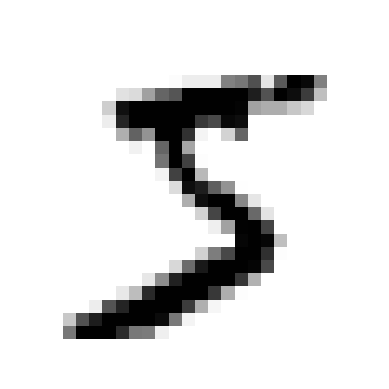

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis('off')
plt.show()

In [7]:
y[0] # Label is also 5

'5'

In [8]:
# Convert String label into (int label)
import numpy as np
y = y.astype(np.uint8)

In [79]:
# Split test and train data
X_train, X_test, y_train, y_test = X[:60000], X[60000:] , y[:60000], y[60000:]

In [80]:
# Create Binary Classifier for Single Digit (5)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [81]:
# Train Binary Classifier using Stochastic Gradient Descent (SGD)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)



SGDClassifier(random_state=42)

In [83]:
dump((sgd_clf),"sgd_clf.joblib")

['sgd_clf.joblib']

In [84]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
# Evaluate using Cross Validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### Observation: 
1. In sdg_clf accuracy is 95% of containing 5 Digit in dataset
2. But in Never5Classifier accuracy is 90% is not 5 Digit in Dataset
3. Concludes Accuracy is not ideal to performance measure for Classifier Model

In [86]:
# Confusion Matrix is used for Performance measure in Classifier
# First we predict the values then compare with actual values to check 
# how many times classifier confused with different Digit

from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [100]:

# dump((y_train_predict),'sgd_clf_predict_score.joblib')
y_train_predict = load('sgd_clf_predict_score.joblib')

In [101]:
from sklearn.metrics import confusion_matrix
 
confusion_matrix(y_train_5,y_train_predict) 

array([[53892,   687],
       [ 1891,  3530]])

In [103]:
y_train_prefect_predictions = y_train_5 # pretend we reach perfection

confusion_matrix(y_train_5,y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]])

The prefect Classifier will only have non zero value only on main diagonal example


In [14]:
# Precision is the accuracy of positive instance
# Recall is ratio of positive instance
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5,y_train_predict)) # => 3530 / (3530+687)
print(recall_score(y_train_5,y_train_predict))    # => 3530 / (3530+1891)

0.8370879772350012
0.6511713705958311


In [104]:
# To compare two classifier we use F1 score
# which use harmonic mean which give weight to low values
# means if both recall and precision are high F1 score will be high
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_predict)

0.7325171197343846

In [19]:
sgd_clf = load("sgd_clf.joblib")

In [105]:
# Decision function assign instance to positive class if score is greater than threshold
# else to negative class
sgd_clf
y_score = sgd_clf.decision_function([some_digit]) # Decision function not allows to set it's score
y_score

array([2164.22030239])

In [106]:
threshold = 0      # but we can get access of decision function score and use threshold                  
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [107]:
threshold = 8000 
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [24]:
# Increased threshold decreases recall because the some_digit image represent digit 5
# How can we know which threshold to use 
# For that we use cross_val_predict with method "decision function"
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [108]:
# We can compute precision,recall and all possible threshold
# using precision_recall_curve() function

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

Recall for 90% Precision:  0.4799852425751706
Threshold for 90% Precision:  3370.0194991439557


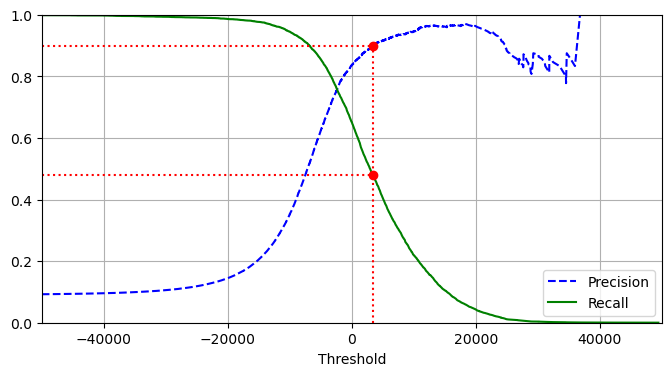

In [109]:
def plot_precision_recall_vs_thresholds(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label="Precision")
    plt.plot(thresholds,recalls[:-1],'g-',label="Recall")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Threshold')
    plt.legend()
    plt.axis([-50000, 50000, 0, 1]) 
    
     
recall_90_precision = recalls[np.argmax(precisions >= 0.90)] # What will be ratio(recall) for 90% accuracy(precision)
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] # What will be threshold for 90% accuracy(precision)
print("Recall for 90% Precision: ",recall_90_precision)
print("Threshold for 90% Precision: ", threshold_90_precision)
plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_thresholds(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")    # Straight line from x axis= 0         
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")  # Horizontal straight line from y axis = 0.9  
                                                              # to x axis = -5000
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")  
                                                              # Horizontal straight line from y axis = 0.47  
                                                              # to x axis = -5000
plt.plot([threshold_90_precision], [0.9], "ro")               # Circle dot from precision 90%                            
plt.plot([threshold_90_precision], [recall_90_precision], "ro") # Circle dot from recall 47%                            
                                          
plt.show()


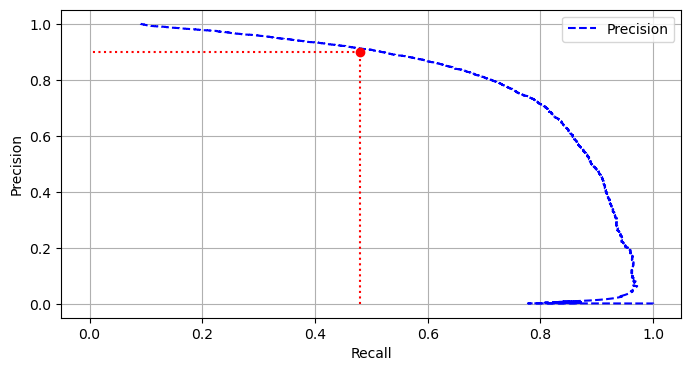

In [110]:
# Precision vs Recall

def precision_vs_recall(precisions,recalls):
    plt.plot(precisions[:-1],recalls[:-1],'b--',label="Precision")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
plt.figure(figsize=(8, 4))                                                                  
precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:") 
plt.plot([recall_90_precision], [0.9], "ro")   
plt.plot([recall_90_precision,0],[0.9,0.9], "r:")

In [111]:
# Find the first index of maximum threshold 

threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [112]:
# Make prediction on training set

y_train_pred_90 = (y_scores >= threshold_90_precision)
print("Precision: ", precision_score(y_train_5,y_train_pred_90))
print("Recall: ", recall_score(y_train_5,y_train_pred_90))

Precision:  0.9000345901072293
Recall:  0.4799852425751706


 ### Obervation:

1. For 90% Precision will be 3370.0194991439557
2. Recall at 90% Precision is 0.4799852425751706

## ROC curve
1. FPR (false positive rate) ratio of negative instance wrongly classified as positive 
2. TPR (true positive rate) ratio of positive instance correctly classified as positive 
3. TNR/Specifity (true negative rate) ratio of negative instance correctly classified as negative 
4. FPR = 1 - (Specifity)

In [113]:
# It is very similar to the precision/recall curve
# Tool used for binary classifier
# Compute FPR and TPR for various threshold using ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

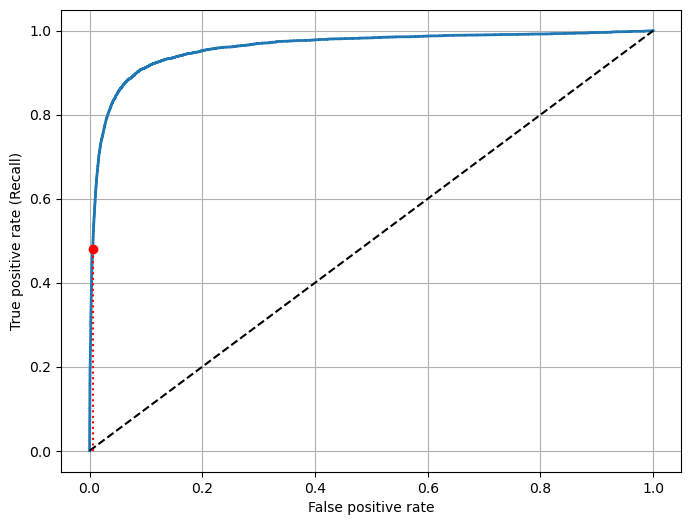

In [114]:
# Plot roc Curve

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.grid(True)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    
plt.figure(figsize=(8, 6))   
plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90], [recall_90_precision], "ro")    
plt.show()

In [115]:
# One way to compare classifiers is to measure the area under the curve (AUC)

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9604938554008616

### Note: 

1. Always use Precision/Recall curve when positive rate is rare
2. ROC curve otherwise

In [116]:
# RandomForestClassifier does not have decision function but predict_proba function

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3, method='predict_proba')


In [120]:
# dump((y_proba_forest), "forest_clf_predict.joblib")
y_proba_forest = load("forest_clf_predict.joblib")

In [121]:
y_proba_forest # probability of instance per row, column per class

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [129]:
y_score_forest = y_proba_forest[:, 1] # score = proba of positive class

fpr_forest, tpr_forest, threshold = roc_curve(y_train_5,y_score_forest)


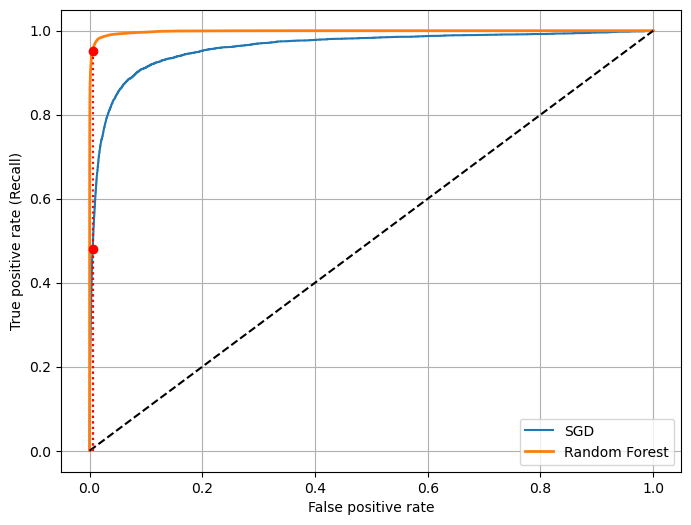

In [142]:
# Compare SGD and RandomForestClassifier

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.grid(True)

# For SGD
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],'r:')
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90], [recall_90_precision], "ro")    

#For Random Forest
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]
plt.plot([fpr_90,fpr_90],[0.,recall_for_forest],'r:')
plt.plot([fpr_90], [recall_for_forest], "ro")    

plt.legend(loc="lower right")
plt.show()

In [165]:
roc_auc_score(y_train_5,y_score_forest)

0.9983436731328145

### Observation:
1. RandomForestClassification Curve is more towards left top corner as compare to SDG 
2. roc_auc_score of RFC is much better to SDG

## Checking 99% Precision for RandomForestClassification

In [166]:
# Now computing Recall and precision of Random Forest Classification

from sklearn.metrics import precision_recall_curve

forest_precisions, forest_recalls, forest_thresholds = precision_recall_curve(y_train_5,y_score_forest)

Forest Recall for 99% Precision:  0.8662608374838591
Forest Threshold for 99% Precision:  0.51


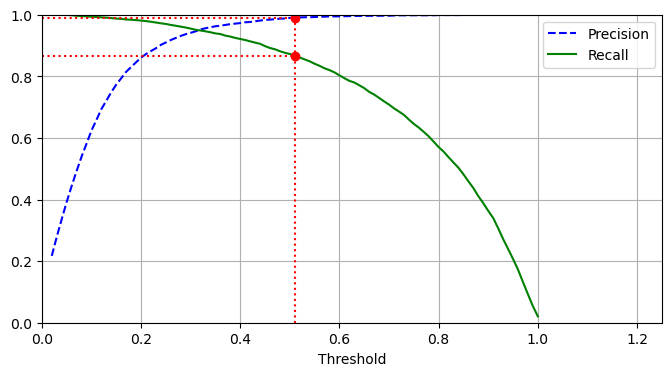

In [224]:
def plot_forest_precision_recall_vs_thresholds(forest_precisions,forest_recalls,forest_thresholds):
    plt.plot(forest_thresholds,forest_precisions[:-1],'b--',label="Precision")
    plt.plot(forest_thresholds,forest_recalls[:-1],'g-',label="Recall")
    plt.grid(True)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel('Threshold')
    plt.legend()
    plt.axis([0, 1.25, 0, 1]) 

    
#---------------#
forest_recall_99_precision = forest_recalls[np.argmax(forest_precisions >= 0.99)] 
forest_threshold_99_precision = forest_thresholds[np.argmax(forest_precisions >= 0.99)]

print("Forest Recall for 99% Precision: ",forest_recall_99_precision)
print("Forest Threshold for 99% Precision: ", forest_threshold_99_precision)
plt.figure(figsize=(8, 4))                                                                  
plot_forest_precision_recall_vs_thresholds(forest_precisions, forest_recalls, forest_thresholds)
plt.plot([forest_threshold_99_precision, forest_threshold_99_precision], [0., 0.99], "r:")    # Straight line from x axis= 0         
plt.plot([0, forest_threshold_99_precision], [0.99, 0.99], "r:")  # Horizontal straight line from y axis = 0.99  
#                                                               # to x axis = 0
plt.plot([0, forest_threshold_99_precision], [forest_recall_90_precision, forest_recall_90_precision], "r:")  
#                                                               # Horizontal straight line from y axis = 0.97  
#                                                               # to x axis = -5000
plt.plot([forest_threshold_99_precision], [0.99], "ro")               # Circle dot from precision 99%                            
plt.plot([forest_threshold_99_precision], [forest_recall_90_precision], "ro")


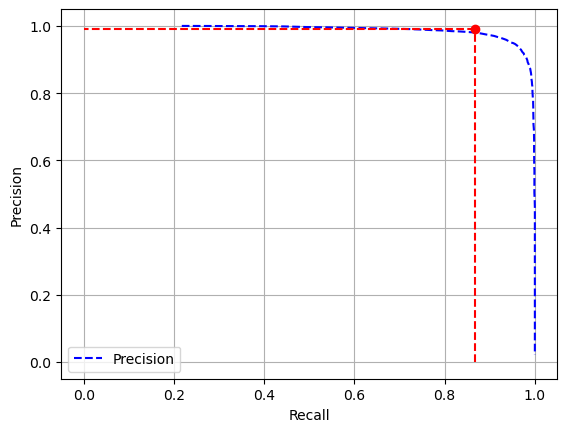

<Figure size 800x400 with 0 Axes>

In [222]:
# Precision vs Recall for Random Forest Classification

precision_vs_recall(forest_precisions,forest_recalls)
plt.plot([forest_recall_99_precision,forest_recall_99_precision],[0,0.99],'r--')
plt.plot([forest_recall_99_precision],[0.99],'ro')
plt.plot([forest_recall_99_precision,0],[0.99,0.99],'r--')
plt.figure(figsize=(8, 4))       
plt.show()

In [223]:
# Find the first index of maximum threshold 

forest_threshold_99_precision = forest_thresholds[np.argmax(forest_precisions >= 0.99)]
forest_threshold_99_precision

0.51

In [225]:
# Make prediction on training set

forest_y_train_pred_99 = (y_score_forest >= forest_threshold_99_precision)
print("Precision: ", precision_score(y_train_5,forest_y_train_pred_99))
print("Recall: ", recall_score(y_train_5,forest_y_train_pred_99))

Precision:  0.9905083315756169
Recall:  0.8662608374838591


### Observation: Predicted Precision and Recall by Threshold using Randorm Forest Classification
At Threshold 0.51
1. Recall is 0.86 
2. Precision is 0.99 